In [9]:
from pymongo import MongoClient
import pandas as pd
from database import get_last_data
import os
from dotenv import load_dotenv
from utils import DATA_SCIENCE_LANGUAGES
import matplotlib.pyplot as plt

In [6]:
SCRAPPER = os.getenv("COLLECTION_SCRAPPER")
API = os.getenv("COLLECTION_API")

# Scrapper

In [7]:
df = pd.DataFrame(get_last_data(collection=API))
df.head(10)

,_id,title,link,tags,author,date
0,6892268dedfea3f160bad525,My test and train data has the same number of ...,https://stackoverflow.com/questions/76781507/m...,"[pandas, machine-learning, scikit-learn, data-...",santiaqool,1690473257
1,6892268dedfea3f160bad524,How to perform Time series forecasting in shor...,https://stackoverflow.com/questions/76797633/h...,"[python, machine-learning, time-series, data-s...",Harsh Walia,1690717947
2,6892268dedfea3f160bad523,Python 3 ipykernel hangs on a particular line ...,https://stackoverflow.com/questions/76799005/p...,"[jupyter-notebook, data-science, jupyter-irker...",Jamilu,1690739425
3,6892268dedfea3f160bad522,How to download XLSX file from DOI link?,https://stackoverflow.com/questions/76812704/h...,"[python, data-science, doi]",Galen,1690900376
4,6892268dedfea3f160bad521,How is this plot plotted?,https://stackoverflow.com/questions/76813915/h...,"[python, matplotlib, plot, data-science]",dmag,1690910281
5,6892268dedfea3f160bad520,Is there a way to generate a completely new te...,https://stackoverflow.com/questions/76824269/i...,"[python, pandas, nlp, data-science, huggingfac...",Hedi Amor,1691023279
6,6892268dedfea3f160bad51f,"How to change a string value with comma (343,5...",https://stackoverflow.com/questions/76824984/h...,"[python, pandas, dataframe, data-science, data...",Uğur Fatih &#199;oku&#231;kun,1691038842
7,6892268dedfea3f160bad51e,Microsoft Graph api connection,https://stackoverflow.com/questions/76826329/m...,"[outlook, microsoft-graph-api, data-science]",Rupendra Siva Prasad Akurathi,1691052125
8,6892268dedfea3f160bad51d,in python pandas data frame shift values from ...,https://stackoverflow.com/questions/76828158/i...,"[python, pandas, dataframe, data-science]",Navaneeth O M,1691066454
9,6892268dedfea3f160bad51c,Question about the graphs of marginal effect i...,https://stackoverflow.com/questions/76833379/q...,"[r, data-science, visualization, margin, inter...",Ryan X,1691129721


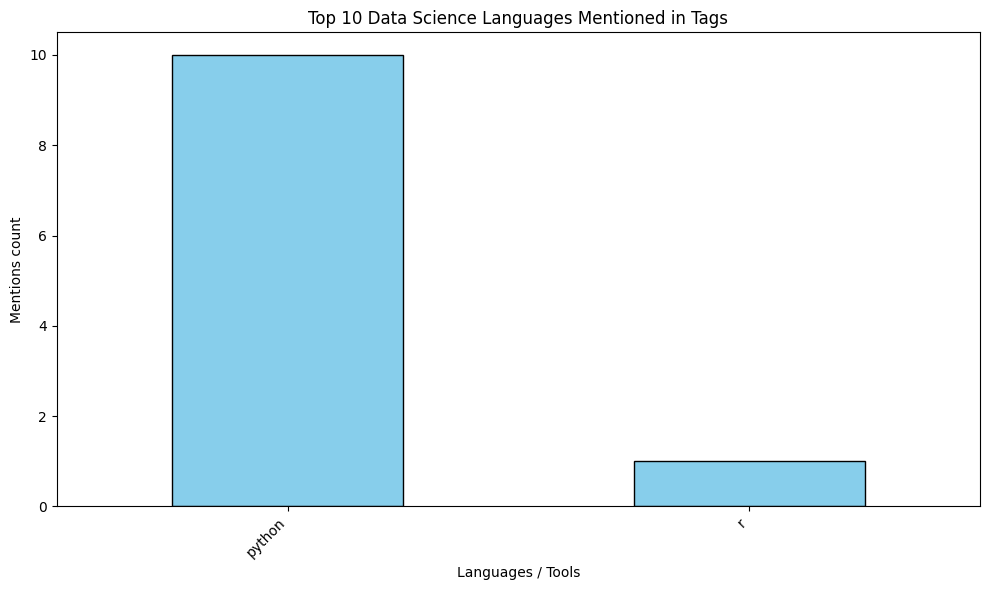

In [11]:
# --- 1. Extraire les tags depuis ton DataFrame ---
# On s'assure que la colonne "tags" existe et est une liste
all_tags = [tag for tags_list in df["tags"] if isinstance(tags_list, list) for tag in tags_list]

# --- 2. Filtrer uniquement ceux qui sont dans la liste DATA_SCIENCE_LANGUAGES ---
filtered_tags = [tag.lower() for tag in all_tags if tag.lower() in DATA_SCIENCE_LANGUAGES]

# --- 3. Compter les occurrences (avec pandas) ---
tag_counts = pd.Series(filtered_tags).value_counts().sort_values(ascending=False)

# --- 4. Visualisation (Top 10) ---
plt.figure(figsize=(10, 6))
tag_counts.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Data Science Languages Mentioned in Tags")
plt.xlabel("Languages / Tools")
plt.ylabel("Mentions count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()